# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from sklearn.neighbors import KDTree

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Check the structure of the data retrieving and if the link is working
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[0]

#Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(cities[0])
print(f"The weather API responded with: {weather_json}.")

ushuaia
The weather API responded with: {'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 282.15, 'feels_like': 270.03, 'temp_min': 282.15, 'temp_max': 282.15, 'pressure': 1000, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 15.43, 'deg': 230, 'gust': 20.58}, 'clouds': {'all': 40}, 'dt': 1616281776, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1616236487, 'sunset': 1616280381}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}.


In [5]:
#Create the query url for the API call
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key 

# create the varients to store data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record=1

print('''
---------------------------
Beginning Data Retrieval
---------------------------''')

for city in cities:       
   
    # use "try and except" to skip the missing values etc 
    try: 
        response = requests.get(url+"&q=" + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except(KeyError,IndexError):
        print("City not found. Skipping...")
    continue
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


---------------------------
Beginning Data Retrieval
---------------------------
Processing Record 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=ushuaia
Processing Record 2 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=vaini
Processing Record 3 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=saint-philippe
Processing Record 4 | Shenzhen
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=shenzhen
City not found. Skipping...
Processing Record 5 | Tigil'
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=tigil
Processing Record 6 | Lucea
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=lucea
City not found. Skipping...
Processing 

Processing Record 57 | Taksimo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=taksimo
Processing Record 58 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=yumen
Processing Record 59 | Morondava
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=morondava
Processing Record 60 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=chernyshevskiy
City not found. Skipping...
Processing Record 61 | Nampula
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=nampula
Processing Record 62 | Skjeberg
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=skjeberg
City not found. Skipping...
Processing Record 63 | Tasiilaq
http://api.openweathermap.org/data/2.5/weath

Processing Record 112 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=olafsvik
Processing Record 113 | Avera
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=avera
City not found. Skipping...
Processing Record 114 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=chokurdakh
Processing Record 115 | Yanta
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=shenxian
Processing Record 116 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=geraldton
Processing Record 117 | Pasni
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=pasni
Processing Record 118 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f

Processing Record 167 | Zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=zheleznodorozhnyy
Processing Record 168 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=eyl
Processing Record 169 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=sinnamary
Processing Record 170 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=itarema
City not found. Skipping...
City not found. Skipping...
Processing Record 171 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=kavieng
Processing Record 172 | El Retén
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=el reten
Processing Record 173 | Careiro da Várzea
http://api.openweathermap.

Processing Record 222 | Netrakona
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=netrakona
Processing Record 223 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=nanortalik
Processing Record 224 | Kawalu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=kawalu
Processing Record 225 | Luján
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=lujan
Processing Record 226 | Tahe
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=tahe
Processing Record 227 | Rāni
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=rani
Processing Record 228 | Baghdad
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=baghdad
Process

Processing Record 279 | Măldăreşti
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=maldaresti
Processing Record 280 | Nova Lima
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=nova lima
Processing Record 281 | Virginia Beach
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=virginia beach
Processing Record 282 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=aklavik
Processing Record 283 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=bilma
Processing Record 284 | Xinyu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=xinyu
Processing Record 285 | Caucayá
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d

Processing Record 335 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=port lincoln
City not found. Skipping...
Processing Record 336 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=kamenka
Processing Record 337 | Ambon City
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=ambon
Processing Record 338 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=laguna
Processing Record 339 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=rocha
Processing Record 340 | Matara
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=matara
City not found. Skipping...
Processing Record 341 | Bilibino
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 392 | Bud
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=bud
Processing Record 393 | Broome
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=broome
City not found. Skipping...
City not found. Skipping...
Processing Record 394 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=port-gentil
Processing Record 395 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=ulaangom
Processing Record 396 | Mayumba
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=mayumba
Processing Record 397 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=tessalit
Processing Record 398 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 447 | Mange
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=mange
Processing Record 448 | Camaná
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=camana
Processing Record 449 | Damietta
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=damietta
Processing Record 450 | Ngunguru
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=ngunguru
Processing Record 451 | Carupano
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=carupano
Processing Record 452 | Linjiang
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=linjiang
Processing Record 453 | Sovetskaya Gavan'
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e

Processing Record 502 | Ocampo
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=ocampo
Processing Record 503 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=saint-joseph
Processing Record 504 | Sanmenxia
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=sanmenxia
Processing Record 505 | Shambu
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=shambu
Processing Record 506 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=bubaque
Processing Record 507 | Mocuba
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e85&q=mocuba
Processing Record 508 | La Reforma
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=f469ca80499f929dc731c3f40d251e8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#DataFrame to store the weather data
weather_data = pd.DataFrame({"City": city_name,
    "Country":country,
    "Lat":lat, 
    "Lng":lng,
    "Date":date,
    "Cloudiness":cloudiness,      
    "Humidity": humidity,
     
    "Max Temp": max_temp,
    "Wind Speed":wind_speed})

#Preview the dataframe
weather_data.count()

City          549
Country       549
Lat           549
Lng           549
Date          549
Cloudiness    549
Humidity      549
Max Temp      549
Wind Speed    549
dtype: int64

In [7]:
weather_data.describe()

,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
count,549.000000,549.000000,5.490000e+02,549.000000,549.000000,549.000000,549.000000
mean,19.557655,20.066097,1.616282e+09,50.136612,69.786885,54.740619,8.308124
std,33.315775,89.236576,2.289559e+02,39.749552,23.632530,26.786012,5.754228
min,-54.800000,-179.166700,1.616281e+09,0.000000,7.000000,-38.070000,0.110000
25%,-7.113900,-60.943300,1.616282e+09,4.000000,58.000000,37.400000,4.090000
50%,22.933300,24.731400,1.616282e+09,51.000000,77.000000,63.000000,6.910000
75%,46.683400,98.529800,1.616282e+09,90.000000,88.000000,76.060000,11.500000
max,78.218600,179.316700,1.616283e+09,100.000000,100.000000,93.990000,46.040000


In [8]:
# Save data frame to CSV
weather_data.to_csv(output_data_file,index=False, header=True)

In [9]:
weather_data.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Ushuaia,AR,-54.8000,-68.3000,1616281776,40,71,48.20,34.52
1,Vaini,TO,-21.2000,-175.2000,1616281787,40,74,86.00,6.91
2,Saint-Philippe,RE,-21.3585,55.7679,1616281788,40,73,78.80,20.71
3,Shenzhen,CN,22.5455,114.0683,1616281575,76,86,75.99,1.01
4,Tigil',RU,57.8000,158.6667,1616281791,87,89,5.97,3.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
humid_cities=weather_data.loc[weather_data["Humidity"]>100]
humid_cities.head()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed


In [11]:
# there are no cties with humid level>100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

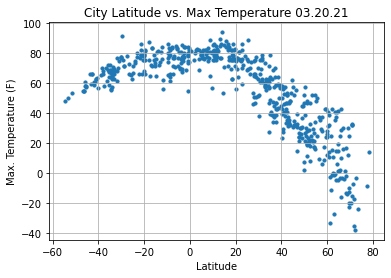

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# graph properties
plt.title("City Latitude vs. Max Temperature 03.20.21")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

By analyzing this plot we can easily visualize that the highest temperature on earth is closer to the equator and also it is evident that the southern hemisphere is warmer than then northern hemisphere.

## Latitude vs. Humidity Plot

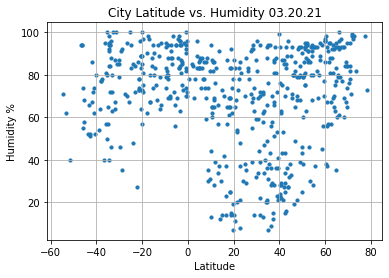

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

#graph properties
plt.title("City Latitude vs. Humidity 03.20.21")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

It is harder to visualize a direct correlation between northern and southern hemisphere’s humidity levels based on the latitude. However it look like there is more variation in Southern hemisphere humidity levels than northern hemisphere humidity levels.

## Latitude vs. Cloudiness Plot

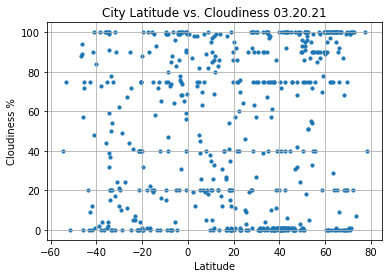

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

#graph properties
plt.title("City Latitude vs. Cloudiness 03.20.21")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

There is no correlation between the Latitude and the Cloudiness.

## Latitude vs. Wind Speed Plot

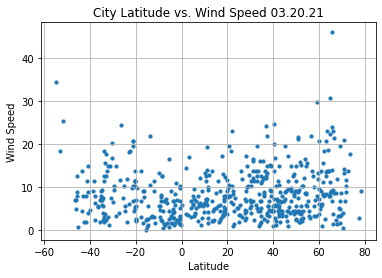

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

#graph properties
plt.title("City Latitude vs. Wind Speed 03.20.21")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Wind Speed.png")

# Show plot
plt.show()

Though there is no direct correlation between, the latitude and the wind speed, there are some out liars at the extreme latitudes.

## Linear Regression

In [26]:
# create two data frames for Northern Hemisphere and Southern Hemisphere

Nothern_Weather=weather_data.loc[weather_data['Lat']>0]
Southern_Weather=weather_data.loc[weather_data['Lat']<=0]
Southern_Weather.dropna()

,City,Country,Lat,Lng,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Ushuaia,AR,-54.8000,-68.3000,1616281776,40,71,48.20,34.52
1,Vaini,TO,-21.2000,-175.2000,1616281787,40,74,86.00,6.91
2,Saint-Philippe,RE,-21.3585,55.7679,1616281788,40,73,78.80,20.71
8,Bluff,NZ,-46.6000,168.3333,1616281796,88,94,55.00,7.00
9,Loa Janan,ID,-0.5830,117.0950,1616281798,99,96,74.41,1.54
...,...,...,...,...,...,...,...,...,...
533,Kerema,PG,-7.9631,145.7785,1616282515,73,69,84.04,0.54
545,Burnie,AU,-41.0667,145.9167,1616282532,100,62,63.00,15.01
546,Torres,BR,-29.3353,-49.7269,1616282533,10,91,75.40,9.42
547,Rio Formoso,BR,-8.6636,-35.1586,1616282535,40,69,78.80,12.66


In [43]:
def line_regres(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8820043938037467


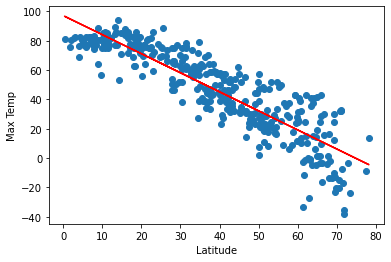

<Figure size 432x288 with 0 Axes>

In [44]:
x = Nothern_Weather['Lat']
y = Nothern_Weather['Max Temp']
line_regres(x,y,'Max Temp')

plt.savefig("output_data/Nothern Hemisphere - Max Temp vs. Latitude.png")

There is a negative correlation between the latitude and the max temperature in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.6381616243592517


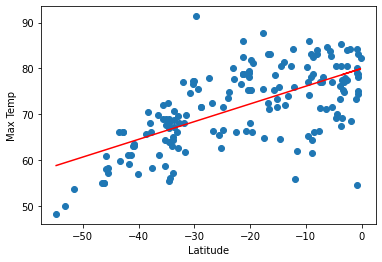

<Figure size 432x288 with 0 Axes>

In [45]:
x = Southern_Weather['Lat']
y = Southern_Weather['Max Temp']
line_regres(x,y,'Max Temp')

plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

There is a positive correlation between the latitude and the max temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.2476516412213478


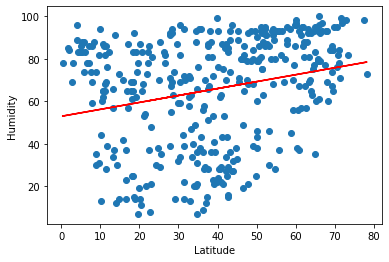

<Figure size 432x288 with 0 Axes>

In [46]:
x = Nothern_Weather['Lat']
y = Nothern_Weather['Humidity']
line_regres(x,y,'Humidity')

plt.savefig("output_data/Northern Hemisphere - Humidity (%)vs. Latitude.png")

There is a very little positive correlation between the latitude and the humidity in the Nothern Hemisphere.Variation goes down with the increase of the Latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.3135114459877658


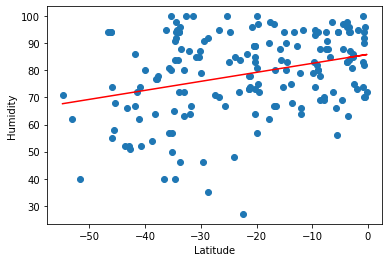

<Figure size 432x288 with 0 Axes>

In [47]:
x = Southern_Weather['Lat']
y = Southern_Weather['Humidity']
line_regres(x,y,'Humidity')

plt.savefig("output_data/Sourthern Hemisphere - Humidity (%)vs. Latitude.png")

There is a very little positive correlation between the latitude and the humidity in the Southern Hemisphere.Variation goes down with the increase of the Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.15310337920785197


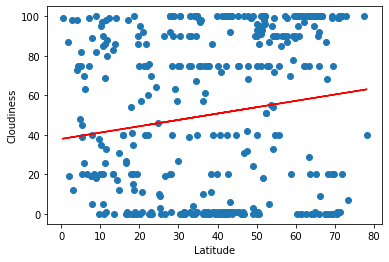

<Figure size 432x288 with 0 Axes>

In [48]:
x = Nothern_Weather['Lat']
y = Nothern_Weather['Cloudiness']
line_regres(x,y,'Cloudiness')

plt.savefig("output_data/Northern Hemisphere-Cloudiness(%) vs. Latitude.png")

There is no identifiable correlation between coudiness and the latitude. But it loks like density of the coulds increases slightly with the latitude, which makes it appear to have a slight positive correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.2155678337713478


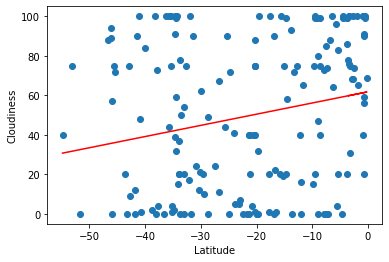

<Figure size 432x288 with 0 Axes>

In [49]:
x = Southern_Weather['Lat']
y = Southern_Weather['Cloudiness']
line_regres(x,y,'Cloudiness')

plt.savefig("output_data/Sourthern Hemisphere -Cloudiness (%)vs. Latitude.png")

There is no identifiable correlation between coudiness and the latitude. But it loks like density of the coulds increases slightly with the latitude, which makes it appear to have a slight positive correlation.

There is no identifiable correlation between coudiness and the latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.19630281739118333


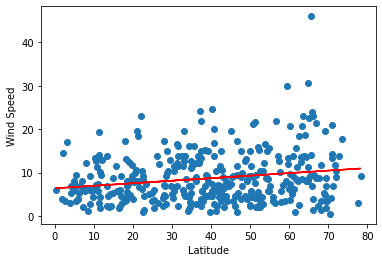

<Figure size 432x288 with 0 Axes>

In [50]:
x = Nothern_Weather['Lat']
y = Nothern_Weather['Wind Speed']
line_regres(x,y,'Wind Speed')

plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

there is a slight positive correlation between the wind speed and the latitude in the Northern Hemisphere. looks like there are extreme out liars when the latitude is at the extreme high levels.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.3306862105731863


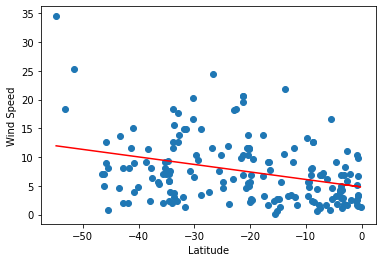

<Figure size 432x288 with 0 Axes>

In [51]:
x = Southern_Weather['Lat']
y = Southern_Weather['Wind Speed']
line_regres(x,y,'Wind Speed')

plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph)vs. Latitude.png")

there is a slight negative correlation between the wind speed and the latitude in the Sourthern Hemisphere. looks like there are extreme out liars when the latitude is at the extreme low levels..